# Data Visualization

### Setting-up

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
import datetime

%run data_cleaning.ipynb

In [2]:
nyc = df1
sao = df2

In [3]:
nyc['tot_duration'] = nyc["out_duration"] + nyc["in_duration"]
sao['tot_duration'] = sao["out_duration"] + sao["in_duration"]

In [4]:
cur_time = datetime.datetime.now()
month = cur_time.strftime('%b')

In [5]:
nyc['date'] = pd.to_datetime(nyc['day_scrap'].astype(str) + ' ' + month + ' ' +nyc['hour_scrap'].astype(str), format='%d %b %H')
nyc['date']= nyc['date'].dt.strftime('%d %b %H h')

In [6]:
nyc.columns

Index(['out_airline_company', 'in_airline_company', 'dep_city', 'arr_city',
       'out_dep_date', 'out_dep_time', 'out_duration', 'out_stop_num',
       'out_arr_date', 'out_arr_time', 'in_dep_date', 'in_dep_time',
       'in_duration', 'in_stop_num', 'in_arr_date', 'in_arr_time',
       'hour_scrap', 'day_scrap', 'ticket_price', 'currency', 'tot_duration',
       'date'],
      dtype='object')

In [7]:
sao['date'] = pd.to_datetime(sao['day_scrap'].astype(str) + ' ' + month + ' ' +sao['hour_scrap'].astype(str), format='%d %b %H')
sao['date']= sao['date'].dt.strftime('%d %b %H h')

In [8]:
swiss_air_nyc = nyc.loc[nyc["in_airline_company"] != "Lufthansa"]
lufthansa_air_nyc = nyc.loc[nyc["in_airline_company"] == "Lufthansa"]

In [9]:
swiss_air_sao = sao.loc[sao["in_airline_company"] != "Lufthansa"]
lufthansa_air_sao = sao.loc[sao["in_airline_company"] == "Lufthansa"]

in_airline_company and out_airline_company have the same values for a given row.
To describe either in_airline_company or out_air_line company is the same. This gave us:
* the count (the lenght of the dataframe rows),
* number of unique values (2: Swiss or Lufthansa), 
* the top (the unique value which is the most frequent in the dataframe) and 
* the frequency (which is the number of frequecy of the top).

In [10]:
nyc["in_airline_company"].describe()

count      2678
unique        2
top       Swiss
freq       1590
Name: in_airline_company, dtype: object

In [11]:
sao["in_airline_company"].describe()

count          2156
unique            2
top       Lufthansa
freq           1228
Name: in_airline_company, dtype: object

In [12]:
nyc["ticket_price"].describe()

count    2678.000000
mean     1020.735347
std       225.351833
min       678.720000
25%       911.660000
50%      1071.160000
75%      1098.370000
max      7499.580000
Name: ticket_price, dtype: float64

In [13]:
swiss_air_nyc["ticket_price"].describe()

count    1590.000000
mean      918.382698
std       135.569918
min       678.720000
25%       811.770000
50%       933.810000
75%      1059.520000
max      1074.480000
Name: ticket_price, dtype: float64

In [14]:
lufthansa_air_nyc["ticket_price"].describe()

count    1088.000000
mean     1170.313208
std       245.929864
min       923.370000
25%      1073.490000
50%      1176.160000
75%      1199.250000
max      7499.580000
Name: ticket_price, dtype: float64

In [15]:
swiss_air_sao["ticket_price"].describe()

count     928.000000
mean     1907.472004
std       122.172407
min      1799.680000
25%      1799.720000
50%      1800.070000
75%      2049.170000
max      2120.590000
Name: ticket_price, dtype: float64

In [16]:
lufthansa_air_sao["ticket_price"].describe()

count    1228.000000
mean     2099.450594
std       202.652348
min      1817.900000
25%      1948.600000
50%      2066.370000
75%      2315.730000
max      2465.760000
Name: ticket_price, dtype: float64

## Line Plot

In [17]:
def plot_df(df, month = month):
    test = df.groupby(['day_scrap', 'hour_scrap'])['ticket_price'].agg(['min', 'mean', 'max'])
    test = test.reset_index()
    test['date'] = pd.to_datetime(test['day_scrap'].astype(str) + ' ' + month + ' ' + test['hour_scrap'].astype(str), format='%d %b %H')

    plt.fill_between(test['date'], test['min'], test['max'], alpha=0.3)
    plt.xticks(rotation=90)
    plt.plot(test['date'], test['mean'], "-s")
    plt.ylim(500, 2500)
    # plt.yticks(range(700, 1300, 50))
    plt.xlabel("Date")
    plt.ylabel("Price [€]")

    ax = plt.gca()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %H h'))

    plt.show()

In [18]:
def line_plot(df=nyc):
    plot_data = df[["ticket_price", "tot_duration", "out_airline_company"]]
    sns.lineplot(data=plot_data, x='tot_duration', y='ticket_price', hue='out_airline_company', estimator='mean')

1. Line plots for NYC destination

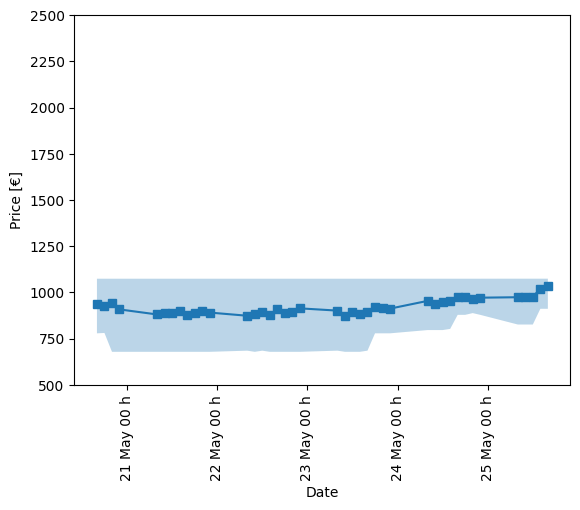

In [19]:
plot_df(df = swiss_air_nyc)

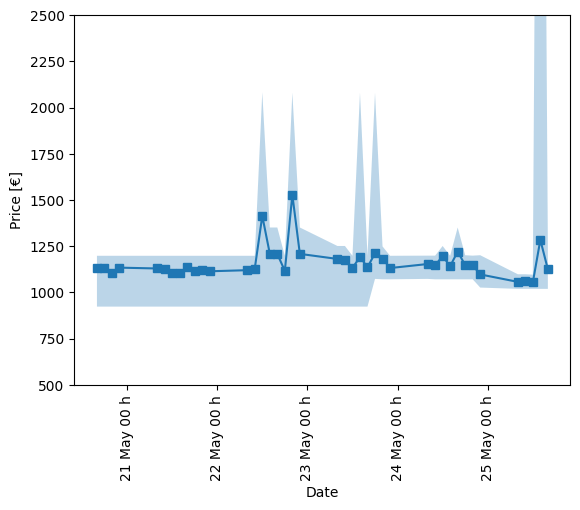

In [20]:
plot_df(df = lufthansa_air_nyc)

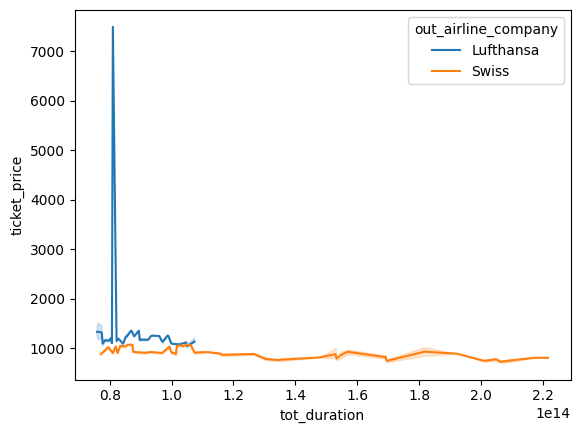

In [21]:
line_plot()

2. Line plots for São Paulo destination

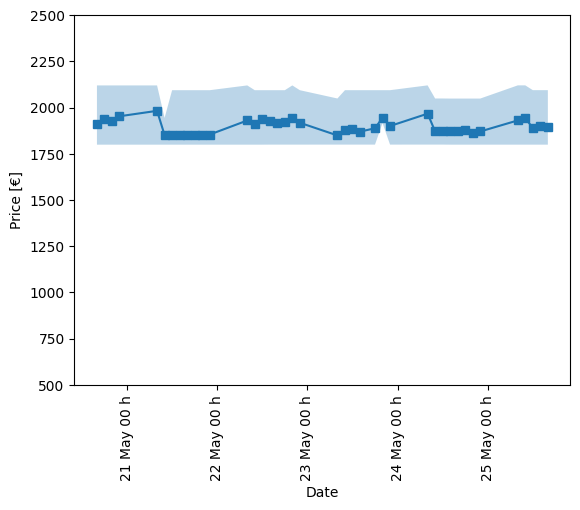

In [22]:
plot_df(df = swiss_air_sao)

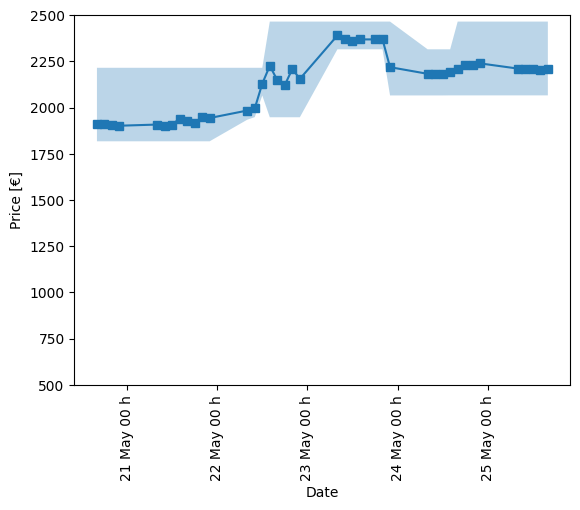

In [23]:
plot_df(df = lufthansa_air_sao)

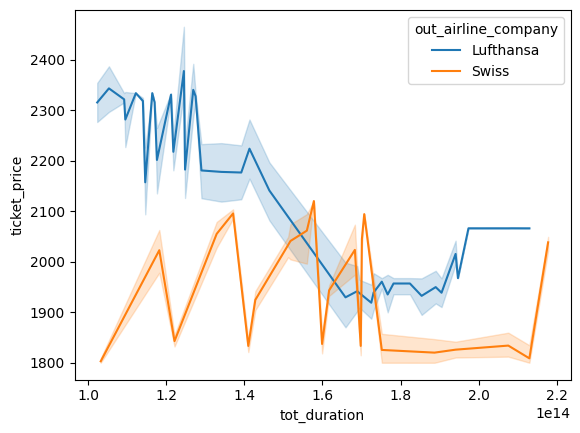

In [24]:
line_plot(sao)

## Bar Chart

In [25]:
def plot_data(df=nyc):
    df['destination'] = df['arr_city'].replace({'JFK': 'New York City', 'GRU': 'São Paulo'})
    df["airline_company"] = df["out_airline_company"]
    data = df[["date", "ticket_price", "airline_company", "tot_duration", "destination"]]
    data = data.sort_values(by='date', ascending = False)

    return data

In [26]:
def bar_chart(plot_data = plot_data()):
    sns.barplot(data = plot_data, x='ticket_price', y='date', hue='airline_company',estimator='mean', capsize=.4, errcolor=".5",
    linewidth=3, edgecolor=".5")

In [27]:
df_merge = pd.concat([plot_data(nyc), plot_data(sao)])

1. NYC

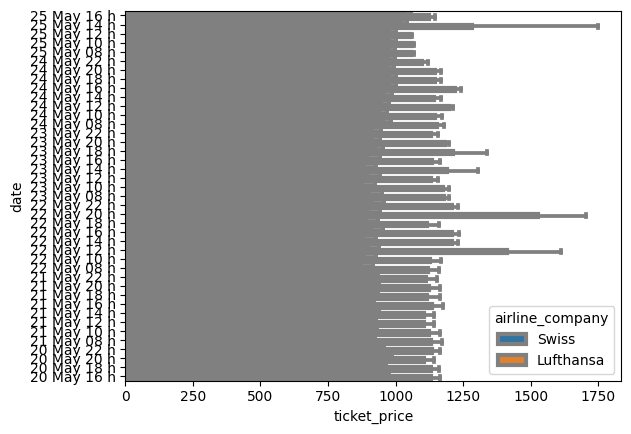

In [28]:
bar_chart(plot_data(nyc))

2. São Paulo

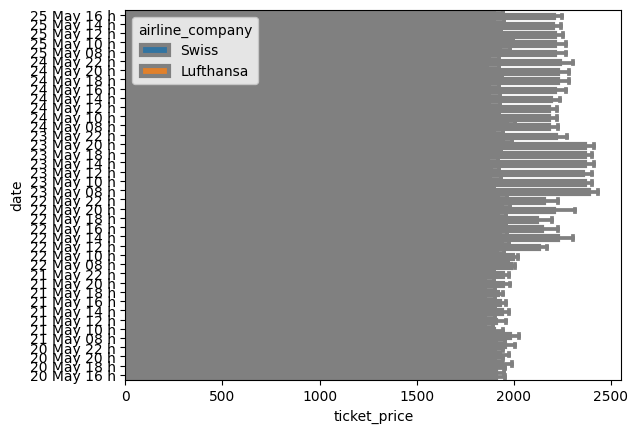

In [29]:
bar_chart(plot_data(sao))

## Scatter Plot

In [30]:
def scatter_plot(data = plot_data()):
    sns.scatterplot(x=data["ticket_price"], y=data["airline_company"])

1. NYC

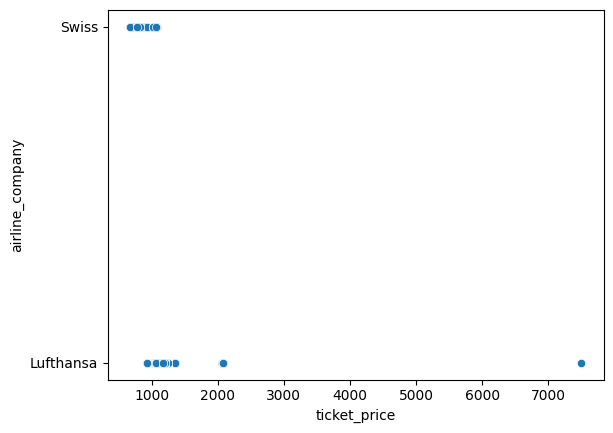

In [31]:
scatter_plot(plot_data(nyc))

2. São Paulo

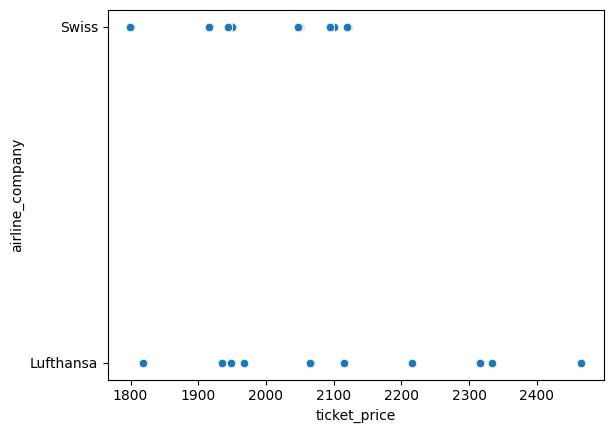

In [32]:
scatter_plot(plot_data(sao))

<Axes: xlabel='ticket_price', ylabel='airline_company'>

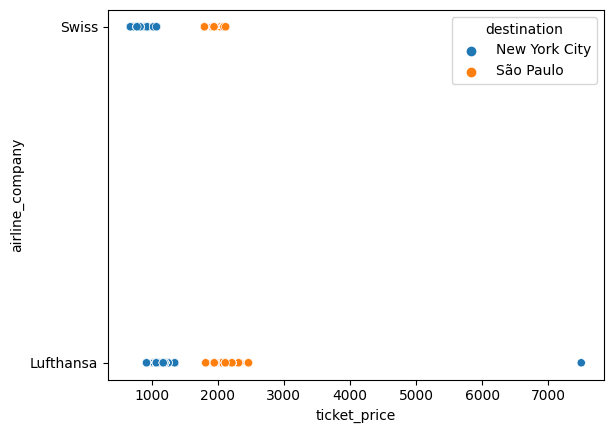

In [33]:
sns.scatterplot(data=df_merge, x='ticket_price', y='airline_company', hue='destination')

## Heatmap

In [34]:
def heatmap(data = plot_data(), y_axis : str= "date", x_axis : str= 'airline_company', val: str= 'ticket_price'):
    data_pivot = data.pivot_table(index = y_axis , columns= x_axis, values= val, aggfunc='mean')
    data_pivot.sort_index(ascending=False, inplace=True)

    sns.heatmap(data_pivot)

1. NYC

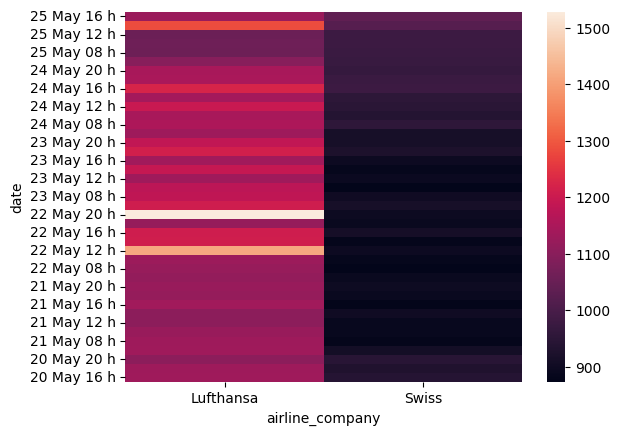

In [35]:
heatmap(plot_data(nyc))

2. Sao

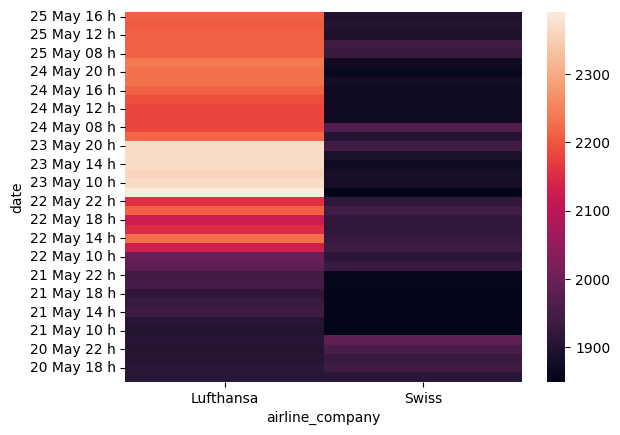

In [36]:
heatmap(plot_data(sao))

3. Merge dataframes nyc and sao

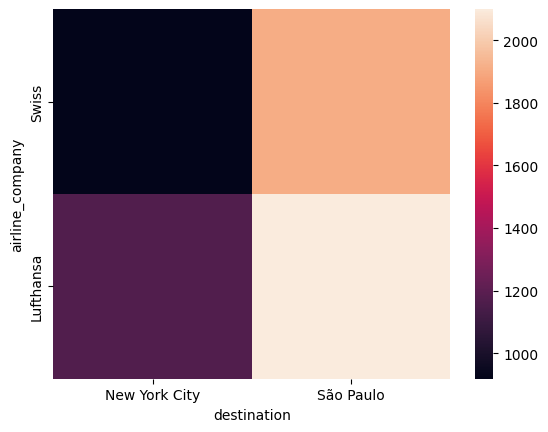

In [37]:
heatmap(data= df_merge, y_axis="airline_company", x_axis="destination")